# University Admit Eligibity Predictor

###Import required packages

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
# to make plots inline within notebook
%matplotlib inline

###Data Reading and perform data analysis

In [31]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DOzlBdGcQBFd0C0hrEEzCX0eXsVLv0SQfpZJHorP0jQR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'uaep67944-donotdelete-pr-ldj1jrv9z2mboh'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
data.drop(["Serial No."], axis=1, inplace=True)

In [33]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [36]:
data.isnull().sum() 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

###Visualization

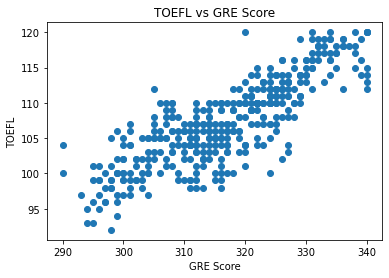

In [37]:
plt.scatter(data['GRE Score'],data['TOEFL Score'])
plt.title('TOEFL vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL')
plt.show()

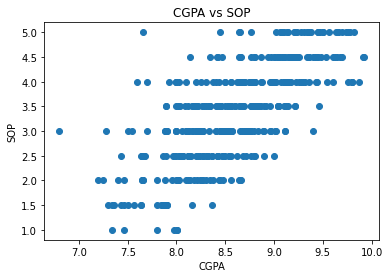

In [38]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('CGPA vs SOP')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

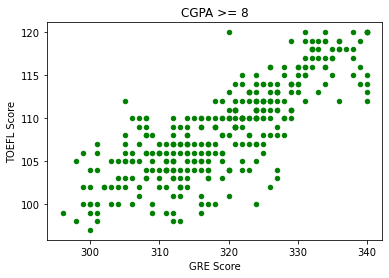

In [39]:
data[data.CGPA >= 8].plot(kind='scatter', x = 'GRE Score', y='TOEFL Score',color="Green")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.title("CGPA >= 8")
plt.show()

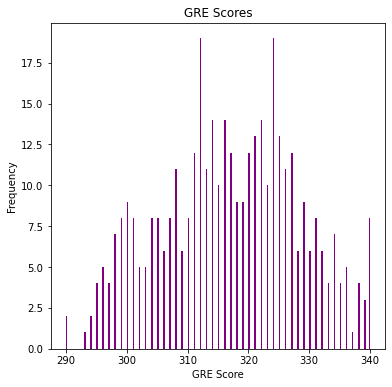

In [40]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6),color = 'purple')

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

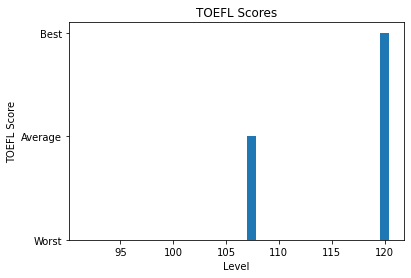

In [41]:
p = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

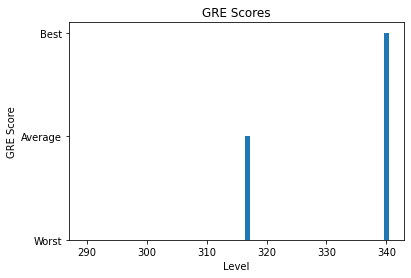

In [42]:
g = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

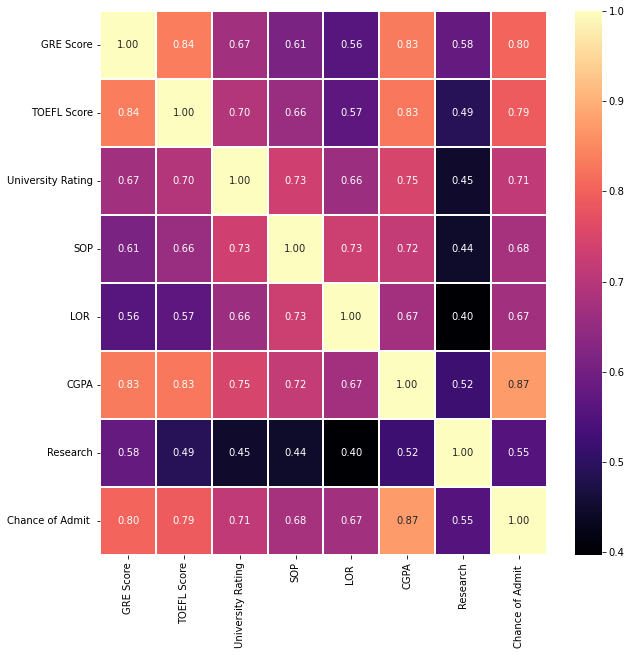

In [43]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

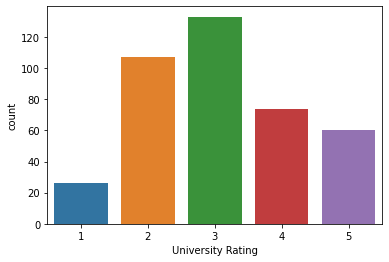

In [44]:
data.Research.value_counts()

sns.countplot(x="University Rating",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

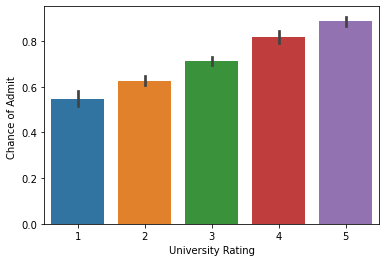

In [45]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

###Train Test Split

In [46]:
X = data.drop(['Chance of Admit '],axis=1) #input data_set
y = data['Chance of Admit '] #output labels

In [47]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

###Model Building & Training

In [48]:
from sklearn.linear_model import LinearRegression
rgr = LinearRegression()
rgr.fit(X_train,y_train)

LinearRegression()

In [49]:
rgr.score(X_test,y_test)

0.8212082591486993

In [50]:
y_predict=rgr.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.047956733620911976
Mean Squared Error: 0.004617003377285005
Root Mean Squared Error: 0.06794853476922813


###Model Hosting

In [52]:
!pip install -U ibm-watson-machine-learning

In [53]:
from ibm_watson_machine_learning import APIClient

In [54]:
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "3-djqxBIyr1X0buXEcoEXxxf00-a4C3qPf9L53Soe4Vv"
}

client = APIClient(wml_credentials)

In [55]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------  ------------------------
ID                                    NAME           CREATED
02298845-5cc0-4ced-aef7-c8cc1f5b0aa2  UAEP_dp_space  2022-11-15T15:48:27.028Z
------------------------------------  -------------  ------------------------


In [56]:
space_id="02298845-5cc0-4ced-aef7-c8cc1f5b0aa2"

In [57]:
client.set.default_space(space_id)

'SUCCESS'

In [58]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [59]:
model_name="UAEPmodel"
deployment="UAEPdeploy"
model_deploy=rgr

In [60]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")

In [61]:
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [62]:
model_props={
    client.repository.ModelMetaNames.NAME : model_name,
    client.repository.ModelMetaNames.TYPE : "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [63]:
model_details = client.repository.store_model(model=model_deploy,meta_props=model_props,training_data=X_train,training_target=y_train)

In [64]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'int64'},
      {'name': 'TOEFL Score', 'type': 'int64'},
      {'name': 'University Rating', 'type': 'int64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-15T16:01:35.099Z',
  'id': '1656aae0-fda7-4af5-8ac8-c6d41a670c01',
  'modified_at': '2022-11-15T16:01:48.997Z',
  'name': 'UAEPmodel',
  'owner': 'IBMid-665002G0SS',
  'resource_key': '95fca8c2-0caa-43cd-a369-5ca9aebcb089',
  'space_id': '02298845-5cc0-4ced-aef7-c8cc1f5b0aa2'},
 'system': {'warnings': []}}